# Linear Regression Algorithm with Cholesky Decomposition

In [1]:
# import numpy, tensorflow, and matplotlib.pyplot modules
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# from tensorflow.python.framework import ops

C:\Users\trevo\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
# Establish a tensorflow graph session
sess = tf.Session()

# Define feature dataset and target values
x_vals = np.linspace(1,10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

# Format feature dataset and target values for model training

# Establish ones np.array for A column matrix 
ones_array = np.repeat(1,100)                           
# Build a column matrix from x value and ones arrays
A = np.matrix(np.column_stack((x_vals, ones_array)))
# Formats y value np.array to a column matrix from a row matrix with transpose method 
b = np.transpose(np.matrix(y_vals))

In [8]:
#Define tensorflow graph constants and model operations for the Cholesky Decomposition

# Define tensorflow constants for A and b
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

At = tf.transpose(A_tensor)
At_A = tf.matmul(At, A_tensor)
L = tf.cholesky(At_A)
At_b = tf.matmul(At, b_tensor)
sol1 = tf.matrix_solve(L, At_b)
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

In [17]:
# train linear regression model with graphic session
solution_eval = sess.run(sol2)
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('The slope = {}'.format(slope))
print('The y_intercept = {}'.format(y_intercept))

The slope = 0.9571476463125362
The y_intercept = 0.1552818262186601


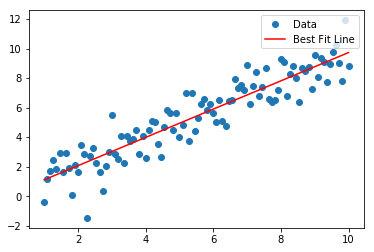

In [18]:
#Visualize of model best fit curve
# Establish list for best fit line value
best_fit_list = []

# Loop to generate best fit line
for i in x_vals:
    best_fit_list.append((slope*i)+y_intercept)

# Plot feature and target data
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit_list, 'r-', label='Best Fit Line')
plt.legend(loc='upper right')
plt.show()